<div class = "alert alert-success">
** LIBRERIAS **: Instalar e importar las librerias necesarias
</div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
%matplotlib inline

from sklearn.model_selection import train_test_split

<div class = "alert alert-success">
** CARGAR DATOS **: Cargo el conjunto de datos
</div>

In [2]:
full_df = pd.read_csv('./airbnb-listings-extract.csv', sep=';', decimal='.')


<div class = "alert alert-success">
1) *** PREPROCESADO *** 
    Hare un primer acercamiento a los datos para conocerlos y eliminar caracteristicas no signifcativas, como alto % de nulos, texto libre, urls, etc. Si bien algunos de estos procesos podemos hacerlos durante el Analisis exploratorio y muchas veces es conviente hacerlo en esa etapa, el proceso temprano me permite tener mas conociento del dataset y por esta razon decido profundizar mas en este momento.
</div>

In [3]:
print(f'Dimensiones del dataset : {full_df.shape}')

Dimensiones del dataset : (14780, 89)


In [4]:
full_df.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [5]:
pd.set_option('display.max_rows', None)
print(full_df.dtypes)
pd.reset_option('display.max_rows')

ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
Summary                            object
Space                              object
Description                        object
Experiences Offered                object
Neighborhood Overview              object
Notes                              object
Transit                            object
Access                             object
Interaction                        object
House Rules                        object
Thumbnail Url                      object
Medium Url                         object
Picture Url                        object
XL Picture Url                     object
Host ID                             int64
Host URL                           object
Host Name                          object
Host Since                         object
Host Location                     

In [6]:
pd.set_option('display.max_rows', None)
print(full_df.describe(include='all').T)
pd.reset_option('display.max_rows')

                                  count unique  \
ID                              14780.0    NaN   
Listing Url                       14780  14780   
Scrape ID                       14780.0    NaN   
Last Scraped                      14780     37   
Name                              14779  14375   
Summary                           14189  13289   
Space                             10888  10174   
Description                       14774  14281   
Experiences Offered               14780      5   
Neighborhood Overview              9134   7912   
Notes                              5644   4652   
Transit                            9066   7839   
Access                             8318   7128   
Interaction                        8226   6584   
House Rules                        9619   8030   
Thumbnail Url                     11960  11957   
Medium Url                        11960  11957   
Picture Url                       14761  14757   
XL Picture Url                    11960  11957   


In [7]:
# Analisis de columnas con valores nulos

pd.set_option('display.max_rows', None)
print(full_df.isnull().sum().sort_values(ascending=False))
pd.reset_option('display.max_rows')


Has Availability                  14768
Host Acceptance Rate              14741
Jurisdiction Names                14553
License                           14431
Square Feet                       14182
Monthly Price                     11219
Weekly Price                      11190
Notes                              9136
Security Deposit                   8524
Interaction                        6554
Access                             6462
Cleaning Fee                       6093
Transit                            5714
Neighborhood Overview              5646
Host About                         5241
Neighbourhood                      5229
House Rules                        5161
Space                              3892
Host Neighbourhood                 3876
Review Scores Value                3341
Review Scores Location             3340
Review Scores Checkin              3337
Review Scores Accuracy             3326
Review Scores Communication        3320
Review Scores Cleanliness          3320


In [8]:
# Listo las variables categoricas con pocos valores unicos para chequear si son
# candidatas a codificacion

def listar_columnas_con_menos_de_diez_valores_distintos(df):
    columnas_seleccionadas = []
    for columna in df.columns:
        if df[columna].dtype == 'object': 
            if df[columna].nunique() < 10 :
                columnas_seleccionadas.append(columna)
    return columnas_seleccionadas


columnas = listar_columnas_con_menos_de_diez_valores_distintos(full_df)

# Mostrar el resultado
print(columnas)


['Experiences Offered', 'Host Response Time', 'Room Type', 'Bed Type', 'Has Availability', 'Cancellation Policy']


In [9]:
print(f' {full_df["Host Response Time"].value_counts()} \n') # Mantener
print(f' {full_df["Room Type"].value_counts()} \n') # Mantener
print(f' {full_df["Bed Type"].value_counts()} \n') # Eliminar, la mayoría son Real Bed
print(f' {full_df["Has Availability"].value_counts()} \n') # Eliminar
print(f' {full_df["Cancellation Policy"].value_counts()} \n') # Mantener
print(f' {full_df["Experiences Offered"].value_counts()} \n') # Eliminar, gran parte no tiene valor.

 Host Response Time
within an hour        7905
within a few hours    2872
within a day          1802
a few days or more     302
Name: count, dtype: int64 

 Room Type
Entire home/apt    8976
Private room       5595
Shared room         209
Name: count, dtype: int64 

 Bed Type
Real Bed         14456
Pull-out Sofa      258
Futon               42
Couch               19
Airbed               5
Name: count, dtype: int64 

 Has Availability
t    12
Name: count, dtype: int64 

 Cancellation Policy
strict             5742
flexible           4671
moderate           4248
strict_new           34
super_strict_60      32
moderate_new         20
super_strict_30      19
flexible_new         14
Name: count, dtype: int64 

 Experiences Offered
none        14763
business        8
family          3
social          3
romantic        3
Name: count, dtype: int64 



In [10]:
full_df['Property Type'].value_counts() # Mantener

Property Type
Apartment             11962
House                  1368
Condominium             363
Bed & Breakfast         353
Loft                    305
Other                   225
Dorm                     44
Guesthouse               42
Chalet                   26
Villa                    19
Townhouse                17
Hostel                   16
Serviced apartment       13
Boutique hotel            6
Boat                      4
Camper/RV                 4
Guest suite               3
Casa particular           3
Earth House               3
Bungalow                  2
Tent                      1
Timeshare                 1
Name: count, dtype: int64

In [11]:
full_df['Accommodates'].value_counts() # Mantener

Accommodates
2     5257
4     3275
1     2056
3     1421
6     1200
5      712
8      327
7      200
10     116
9       70
12      56
16      44
11      25
14      13
15       5
13       3
Name: count, dtype: int64

In [12]:
full_df['Bed Type'].value_counts() # Eliminar

Bed Type
Real Bed         14456
Pull-out Sofa      258
Futon               42
Couch               19
Airbed               5
Name: count, dtype: int64

In [13]:
full_df['Cleaning Fee'].value_counts() # Mantener

Cleaning Fee
30.0    1384
20.0    1233
10.0     851
15.0     750
25.0     739
        ... 
54.0       1
89.0       1
82.0       1
88.0       1
94.0       1
Name: count, Length: 111, dtype: int64

In [14]:
# Chequeo del nombre de Ciudad
full_df['City'].value_counts()

City
Madrid            13207
Barcelona           292
London              132
Paris               108
马德里                  52
                  ...  
Son Moll              1
La Habana             1
Mile End / Bow        1
Sint-Gillis           1
Son Vida              1
Name: count, Length: 246, dtype: int64

In [15]:
full_df.City.sort_values().unique()

array(['Alaró', 'Albert Park', 'Alcudia', 'Alcúdia', 'Algaida',
       'Amsterdam', 'Andratx', 'Antwerpen', 'Aravaca', 'Aravaca (Madrid)',
       'Ariany', 'Athens', 'Athina', 'Austin', 'Balearic Islands',
       'Ballsbridge', 'Barcelona', 'Berlin', 'Berlín', 'Berowra Waters',
       'Betlem', 'Beverly Hills', 'Biniamar', 'Binissalem',
       'Binissalem-Mallorca DO', 'Boadilla del Monte', 'Bondi',
       'Bondi Beach', 'Bondi Junction', 'Boston', 'Brent', 'Bronx',
       'Brooklyn', 'Brunswick', 'Brussel', 'Bruxelles', 'Bunyola',
       'Búger', 'Caimari', 'Cala Agulla', 'Cala Anguila-Cala Mendia',
       'Cala Ferrera', 'Cala Magrana', 'Cala Murada', 'Cala Pi',
       'Cala Ratjada', 'Cala Santanyí', 'Calvià', 'Campanet', 'Campos',
       'Can Pastilla', 'Can Picafort', 'Centro', 'Centro, Madrid',
       'Chelsea, London', 'Chicago', 'Chiva', 'Chueca', 'Chueca, Madrid',
       'Clongriffin', 'Cologny', 'Colonia Sant Pere',
       'Colonia de Sant Pere', 'Colònia de Sant Jordi',
    

In [16]:
# Busco nombres simialres a Madrid y me quedo con los validos.

full_df = full_df[full_df.City.str.contains("Madri") | full_df.City.str.contains("MADRI") | full_df.City.str.contains("madri")  ]
full_df.City.sort_values().unique()

array(['Aravaca (Madrid)', 'Centro, Madrid', 'Chueca, Madrid',
       'Comunidad de Madrid', 'Delicias-Madrid', 'MADRID', 'Madri',
       'Madrid', 'Madrid, Comunidad de Madrid, ES',
       'Madrid, Comunidad de Madrid, ESPANA',
       'Madrid, Vallecas (Fontarrón)', 'las matas  madrid', 'madrid'],
      dtype=object)

In [17]:
full_df.Amenities

40       TV,Wireless Internet,Kitchen,Heating,Essential...
41       TV,Internet,Wireless Internet,Air conditioning...
42       TV,Internet,Wireless Internet,Air conditioning...
43       Internet,Wireless Internet,Kitchen,Doorman,Ele...
44       TV,Internet,Wireless Internet,Air conditioning...
                               ...                        
14753    Internet,Wireless Internet,Kitchen,Free parkin...
14754    TV,Wireless Internet,Air conditioning,Kitchen,...
14755    TV,Wireless Internet,Kitchen,Family/kid friend...
14756    Internet,Wireless Internet,Air conditioning,Ki...
14757    Internet,Wireless Internet,Wheelchair accessib...
Name: Amenities, Length: 13246, dtype: object

In [18]:
def extraer_nombres_unicos(df, columna):
    # Crear un conjunto vacío
    nombres_unicos = set()
    
    for amenidades in df[columna]:
        if isinstance(amenidades, str):
            nombres_unicos.update(amenidades.split(','))
    
    nombres_unicos.discard('')
    
    return nombres_unicos

# Muestro el resultado. Si es posible trabajare con esto mas adelante
nombres_unicos = extraer_nombres_unicos(full_df, 'Amenities')
print(nombres_unicos)

{'Game console', 'Cable TV', 'Private living room', 'Children’s books and toys', 'Keypad', 'Doorman Entry', 'TV', 'Private entrance', 'Lock on bedroom door', 'Smoke detector', 'Crib', 'Elevator in building', 'Buzzer/wireless intercom', 'Heating', 'Washer', 'translation missing: en.hosting_amenity_50', 'Laptop friendly workspace', 'Indoor fireplace', 'Gym', 'Room-darkening shades', 'Changing table', '24-hour check-in', 'Iron', 'Cat(s)', 'Hangers', 'Hot tub', 'Hair dryer', 'Family/kid friendly', 'Fire extinguisher', 'Washer / Dryer', 'High chair', 'Wireless Internet', 'Suitable for events', 'Carbon monoxide detector', 'Paid parking off premises', 'Shampoo', 'Breakfast', 'Outlet covers', 'Table corner guards', 'Smartlock', 'Self Check-In', 'Dryer', 'Baby bath', 'First aid kit', 'Dog(s)', 'Babysitter recommendations', 'Kitchen', 'Doorman', 'Pool', 'Pets live on this property', 'Smoking allowed', 'Bathtub', 'Window guards', 'Pets allowed', 'Free parking on street', 'Stair gates', 'Pack ’n P

In [19]:
full_df['Neighbourhood Cleansed'].value_counts()

Neighbourhood Cleansed
Embajadores       1849
Universidad       1362
Palacio           1084
Sol                941
Justicia           786
                  ... 
Fuentelareina        3
Cuatro Vientos       3
El Goloso            3
Orcasitas            2
El Pardo             1
Name: count, Length: 126, dtype: int64

In [20]:
# Reemplaza los valores nulos en price con la media del barrio
mean_price_per_neighbourhood = full_df.groupby('Neighbourhood Cleansed')['Price'].transform('mean')

full_df['Price'] = full_df['Price'].fillna(mean_price_per_neighbourhood)

In [21]:
full_df.shape

(13246, 89)

In [22]:
### Elimino las columnas para mejorar el dataset segun la visualizacion de datos

# Total de registros 13246

# Categoricas a mantener
# ['Host Response Time', 'Room Type', 'Cancellation Policy']

# Columnas que continen URLs
colsUrls = [col for col in list(full_df.columns) if 'Url' in col]

colsNulos = ['Has Availability','Host Acceptance Rate', 'Jurisdiction Names', 'License', 
               'Square Feet', 'Monthly Price', 'Weekly Price', 'Notes', 'Security Deposit']


colOtras = ['ID','Listing Url','Scrape ID','Last Scraped','Name','Summary','Space','Description','Experiences Offered','Neighborhood Overview','Notes','Transit','Access',
'Interaction','House Rules','Thumbnail Url','Medium Url','Picture Url','XL Picture Url','Host ID','Host URL','Host Name','Host Since','Host Location','Host About',
'Host Response Rate','Host Acceptance Rate','Host Thumbnail Url','Host Picture Url','Host Neighbourhood','Host Listings Count','Host Total Listings Count',
'Host Verifications','Street','Neighbourhood','Neighbourhood Group Cleansed','City','State','Zipcode','Market','Smart Location',
'Country Code','Country','Bed Type','Square Feet','Weekly Price','Monthly Price','Security Deposit','Calendar Updated','Calendar last Scraped','First Review',
'Last Review','License','Jurisdiction Names','Calculated host listings count','Reviews per Month','Geolocation','Features','Amenities']


print(f'Columnas a eliminar Url : {len(colsUrls)} -> {colsUrls} \n')
print(f'Columnas a eliminar + 50% Nulos : {len(colsNulos)} -> {colsNulos} \n')

cols = colsUrls + colsNulos + colOtras

print(f'Columnas a eliminar : -> {cols} \n')

print(f'Columnas a eliminar : {len(cols)} \n')

Columnas a eliminar Url : 7 -> ['Listing Url', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host Thumbnail Url', 'Host Picture Url'] 

Columnas a eliminar + 50% Nulos : 9 -> ['Has Availability', 'Host Acceptance Rate', 'Jurisdiction Names', 'License', 'Square Feet', 'Monthly Price', 'Weekly Price', 'Notes', 'Security Deposit'] 

Columnas a eliminar : -> ['Listing Url', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host Thumbnail Url', 'Host Picture Url', 'Has Availability', 'Host Acceptance Rate', 'Jurisdiction Names', 'License', 'Square Feet', 'Monthly Price', 'Weekly Price', 'Notes', 'Security Deposit', 'ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'H

In [23]:
full_df =  full_df.drop(cols, axis=1)


In [24]:
full_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Host Response Time,11586,4,within an hour,7134,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Neighbourhood Cleansed,13246,126,Embajadores,1849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,13246.0,NaN,NaN,NaN,40.420529,0.020108,40.331888,40.410054,40.418631,40.427789,40.562736
Longitude,13246.0,NaN,NaN,NaN,-3.697143,0.023448,-3.863907,-3.707796,-3.701578,-3.693796,-3.573613
Property Type,13246,22,Apartment,10921,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Room Type,13246,3,Entire home/apt,7921,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Accommodates,13246.0,NaN,NaN,NaN,3.189567,1.990559,1.0,2.0,2.0,4.0,16.0
Bathrooms,13197.0,NaN,NaN,NaN,1.252709,0.599378,0.0,1.0,1.0,1.0,8.0
Bedrooms,13223.0,NaN,NaN,NaN,1.294563,0.826212,0.0,1.0,1.0,2.0,10.0
Beds,13197.0,NaN,NaN,NaN,1.985451,1.510678,1.0,1.0,2.0,2.0,16.0


In [25]:
# Continuo con la evaluacion de las columnas
print(f' {full_df["Review Scores Accuracy"].value_counts()} \n') # Mantener
print(f' {full_df["Review Scores Cleanliness"].value_counts()} \n') # Mantener
print(f' {full_df["Review Scores Checkin"].value_counts()} \n') # Mantener
print(f' {full_df["Review Scores Communication"].value_counts()} \n') # Mantener
print(f' {full_df["Review Scores Location"].value_counts()} \n') # Mantener
print(f' {full_df["Review Scores Value"].value_counts()} \n') # Mantener


 Review Scores Accuracy
10.0    6027
9.0     3250
8.0      768
7.0      162
6.0      101
4.0       32
2.0       23
5.0       16
3.0        2
Name: count, dtype: int64 

 Review Scores Cleanliness
10.0    5723
9.0     3208
8.0      995
7.0      232
6.0      147
4.0       30
5.0       24
2.0       22
3.0        6
Name: count, dtype: int64 

 Review Scores Checkin
10.0    7511
9.0     2246
8.0      423
7.0       70
6.0       69
2.0       20
4.0       17
5.0       13
3.0        2
Name: count, dtype: int64 

 Review Scores Communication
10.0    7657
9.0     2156
8.0      396
7.0       79
6.0       55
4.0       17
2.0       17
5.0       10
Name: count, dtype: int64 

 Review Scores Location
10.0    6823
9.0     2674
8.0      693
7.0       93
6.0       62
5.0       10
2.0        8
4.0        6
Name: count, dtype: int64 

 Review Scores Value
10.0    4523
9.0     4326
8.0     1107
7.0      204
6.0      132
4.0       32
5.0       20
2.0       20
3.0        5
Name: count, dtype: int64 



In [26]:
# Visualizacion de los Tipos de datos
pd.set_option('display.max_rows', None)
print(full_df.dtypes)
pd.reset_option('display.max_rows')

Host Response Time              object
Neighbourhood Cleansed          object
Latitude                       float64
Longitude                      float64
Property Type                   object
Room Type                       object
Accommodates                     int64
Bathrooms                      float64
Bedrooms                       float64
Beds                           float64
Price                          float64
Cleaning Fee                   float64
Guests Included                  int64
Extra People                     int64
Minimum Nights                   int64
Maximum Nights                   int64
Availability 30                  int64
Availability 60                  int64
Availability 90                  int64
Availability 365                 int64
Number of Reviews                int64
Review Scores Rating           float64
Review Scores Accuracy         float64
Review Scores Cleanliness      float64
Review Scores Checkin          float64
Review Scores Communicati

In [27]:
full_df.shape

(13246, 29)

In [28]:
# Otra mirada sobre los valores nulos

pd.set_option('display.max_rows', None)
print(full_df.isnull().sum())
pd.reset_option('display.max_rows')


Host Response Time             1660
Neighbourhood Cleansed            0
Latitude                          0
Longitude                         0
Property Type                     0
Room Type                         0
Accommodates                      0
Bathrooms                        49
Bedrooms                         23
Beds                             49
Price                             0
Cleaning Fee                   5408
Guests Included                   0
Extra People                      0
Minimum Nights                    0
Maximum Nights                    0
Availability 30                   0
Availability 60                   0
Availability 90                   0
Availability 365                  0
Number of Reviews                 0
Review Scores Rating           2847
Review Scores Accuracy         2865
Review Scores Cleanliness      2859
Review Scores Checkin          2875
Review Scores Communication    2859
Review Scores Location         2877
Review Scores Value         

In [29]:
# Elimino caractericas con alto % de nulos

full_df = full_df.drop(['Cleaning Fee'], axis=1)

In [30]:
full_df['Price'].value_counts

<bound method IndexOpsMixin.value_counts of 40       28.0
41       58.0
42       70.0
43       26.0
44       70.0
         ... 
14753    16.0
14754    35.0
14755    25.0
14756    50.0
14757    16.0
Name: Price, Length: 13246, dtype: float64>

<div class = "alert alert-success">
3) *** NUEVAS VARIABLES
</div>

<div class = "alert alert-success">
3) *** DIVIDIR DATOS EN TRAIN Y TEST
</div>

In [31]:
# Divido en train y test 

train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset : {full_df.shape}')
print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 
df = pd.read_csv('./train.csv', sep=';', decimal='.')

Dimensiones del dataset : (13246, 28)
Dimensiones del dataset de training: (10596, 28)
Dimensiones del dataset de test: (2650, 28)


<div class = "alert alert-success">
4 ***) ANALISIS EXPLORATORIO
</div>

In [32]:
# Resumen estadístico
print(df.describe(include='all'))

       Host Response Time Neighbourhood Cleansed      Latitude     Longitude  \
count                9278                  10596  10596.000000  10596.000000   
unique                  4                    125           NaN           NaN   
top        within an hour            Embajadores           NaN           NaN   
freq                 5709                   1466           NaN           NaN   
mean                  NaN                    NaN     40.420515     -3.697148   
std                   NaN                    NaN      0.020165      0.023431   
min                   NaN                    NaN     40.332953     -3.822403   
25%                   NaN                    NaN     40.410038     -3.707708   
50%                   NaN                    NaN     40.418583     -3.701505   
75%                   NaN                    NaN     40.427829     -3.693881   
max                   NaN                    NaN     40.514247     -3.573613   

       Property Type        Room Type  

In [33]:
# Conteo de valores faltantes
print(df.isnull().sum())

Host Response Time             1318
Neighbourhood Cleansed            0
Latitude                          0
Longitude                         0
Property Type                     0
Room Type                         0
Accommodates                      0
Bathrooms                        41
Bedrooms                         18
Beds                             42
Price                             0
Guests Included                   0
Extra People                      0
Minimum Nights                    0
Maximum Nights                    0
Availability 30                   0
Availability 60                   0
Availability 90                   0
Availability 365                  0
Number of Reviews                 0
Review Scores Rating           2290
Review Scores Accuracy         2305
Review Scores Cleanliness      2298
Review Scores Checkin          2312
Review Scores Communication    2298
Review Scores Location         2314
Review Scores Value            2314
Cancellation Policy         

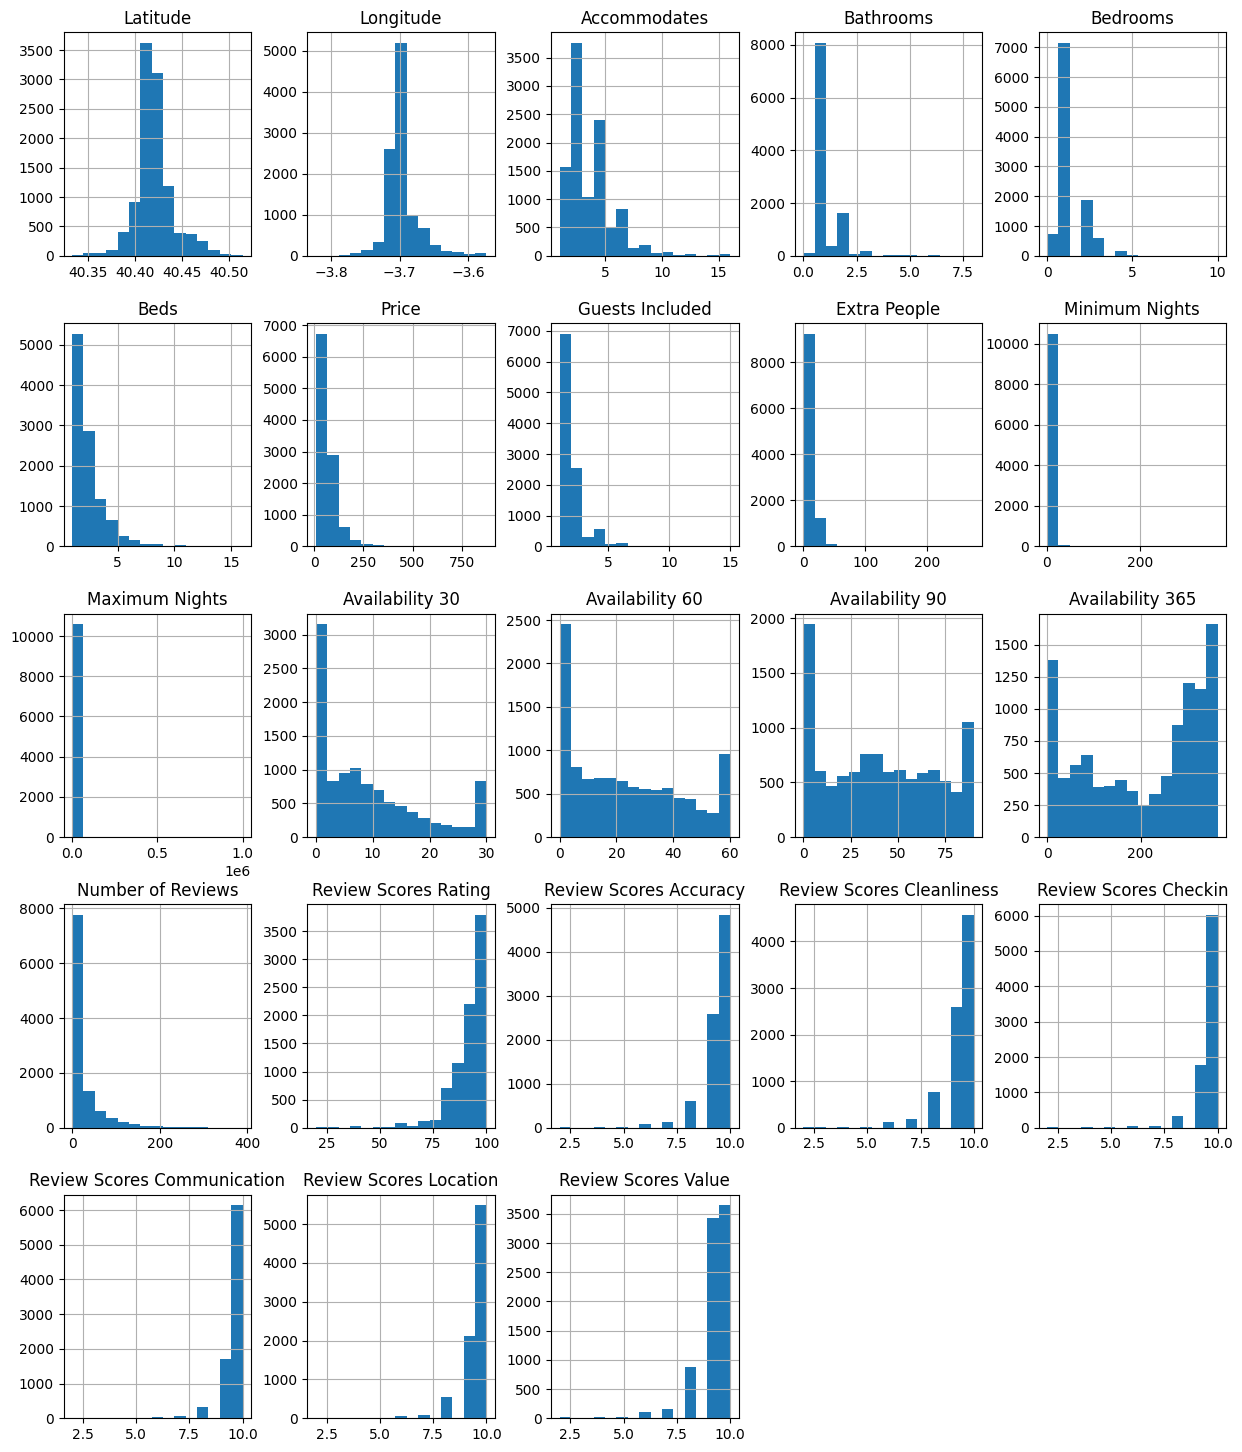

In [34]:
# Histograma para variables numéricas
df.hist(bins=15, figsize=(15, 18))
plt.show()

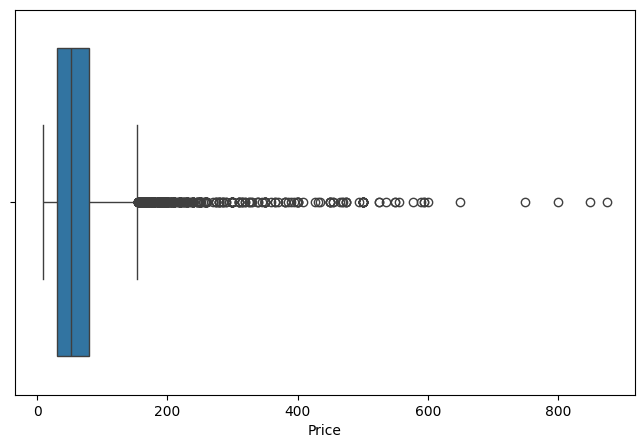

In [35]:
# Boxplot para el precio
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Price'])
plt.show()


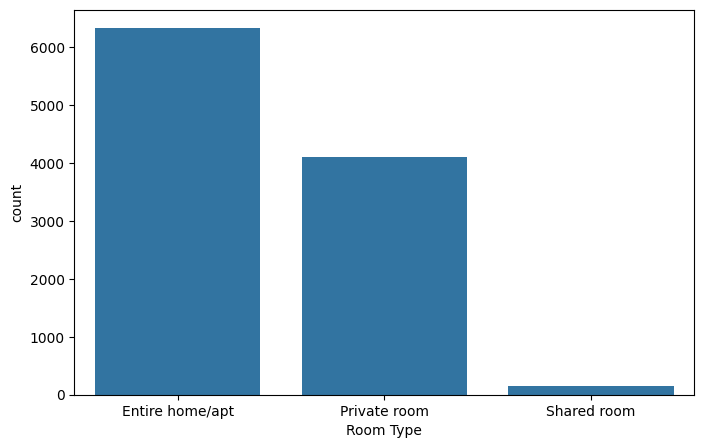

In [36]:
# Distribución de una variable categórica
plt.figure(figsize=(8, 5))
sns.countplot(x='Room Type', data=df)
plt.show()


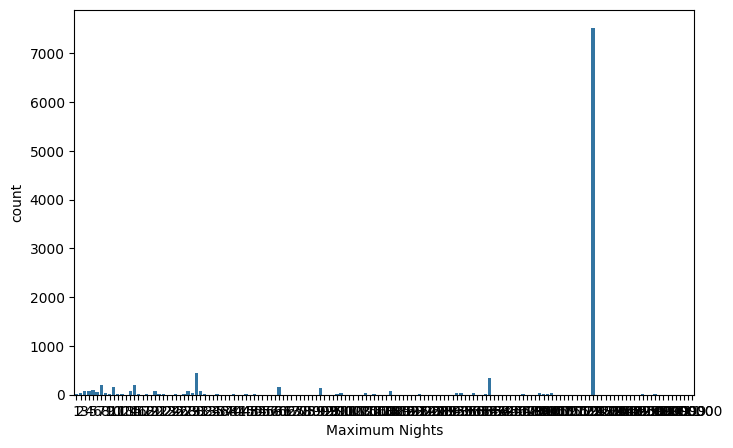

In [37]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Maximum Nights', data=df)
plt.show()

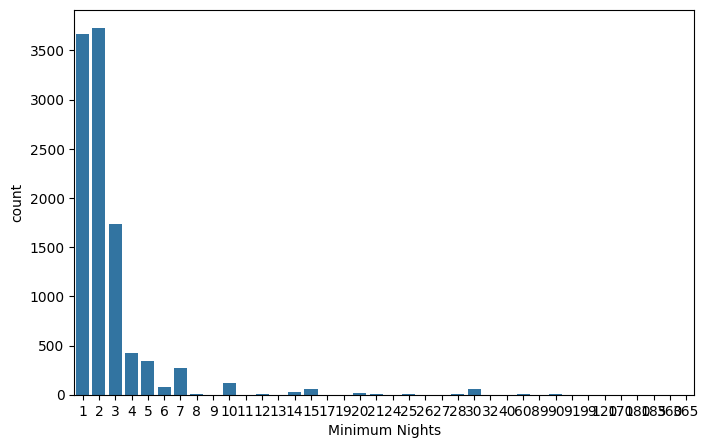

In [38]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Minimum Nights', data=df)
plt.show()

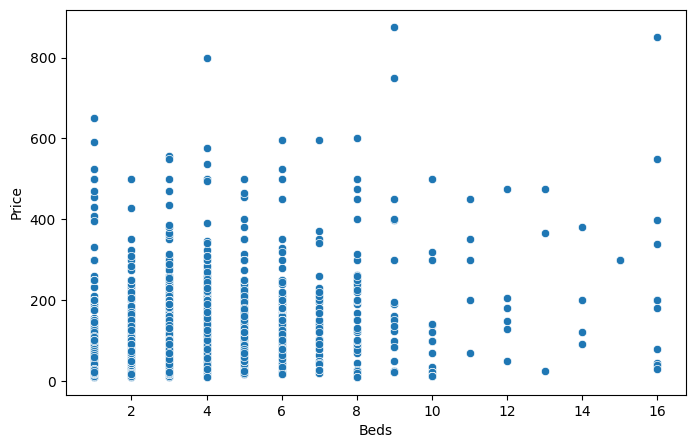

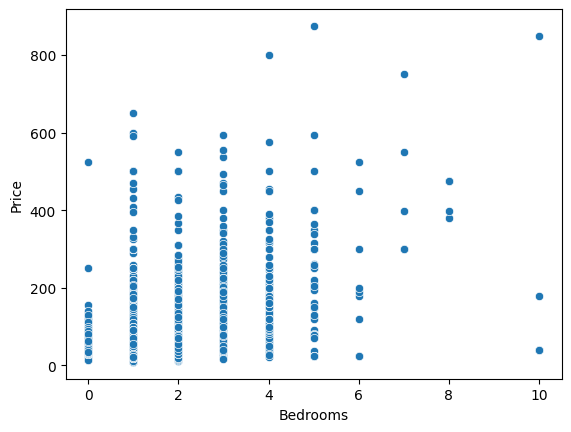

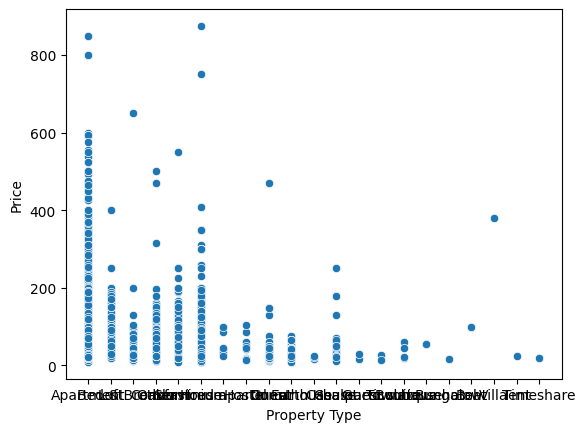

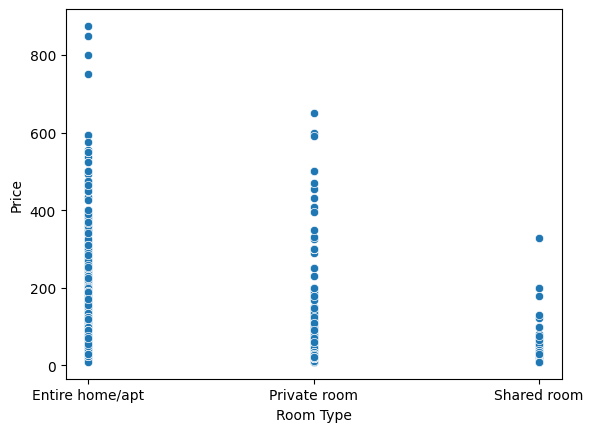

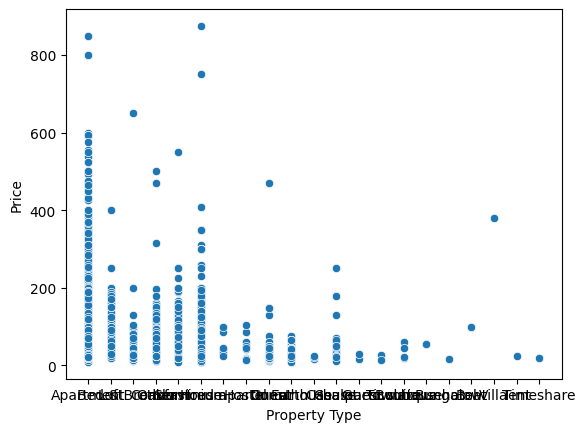

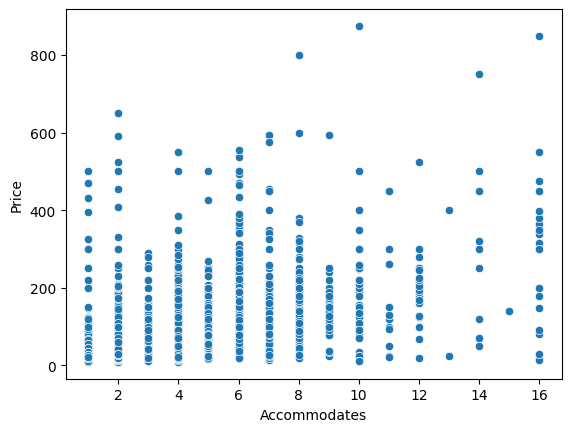

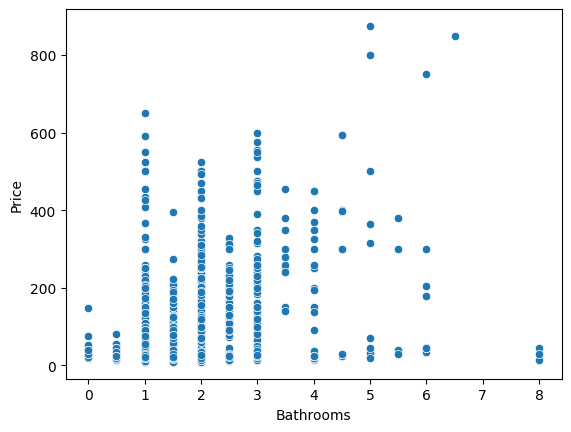

In [39]:
# Scatter plot para relaciones entre variables
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Beds', y='Price', data=df)
plt.show()
sns.scatterplot(x='Bedrooms', y='Price', data=df)
plt.show()
sns.scatterplot(x='Property Type', y='Price', data=df)
plt.show()
sns.scatterplot(x='Room Type', y='Price', data=df)
plt.show()
sns.scatterplot(x='Property Type', y='Price', data=df)
plt.show()
sns.scatterplot(x='Accommodates', y='Price', data=df)
plt.show()
sns.scatterplot(x='Bathrooms', y='Price', data=df)
plt.show()


In [40]:
# Información general del conjunto de datos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10596 entries, 0 to 10595
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Host Response Time           9278 non-null   object 
 1   Neighbourhood Cleansed       10596 non-null  object 
 2   Latitude                     10596 non-null  float64
 3   Longitude                    10596 non-null  float64
 4   Property Type                10596 non-null  object 
 5   Room Type                    10596 non-null  object 
 6   Accommodates                 10596 non-null  int64  
 7   Bathrooms                    10555 non-null  float64
 8   Bedrooms                     10578 non-null  float64
 9   Beds                         10554 non-null  float64
 10  Price                        10596 non-null  float64
 11  Guests Included              10596 non-null  int64  
 12  Extra People                 10596 non-null  int64  
 13  Minimum Nights  

In [41]:
# Muestro las columnas 
df.columns

Index(['Host Response Time', 'Neighbourhood Cleansed', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Price', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Maximum Nights', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Number of Reviews',
       'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Cancellation Policy'],
      dtype='object')

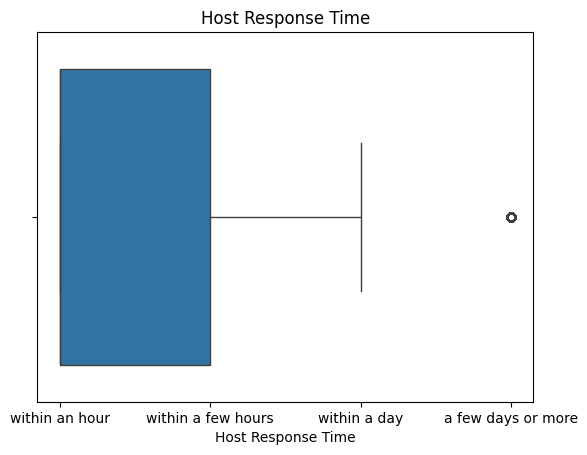

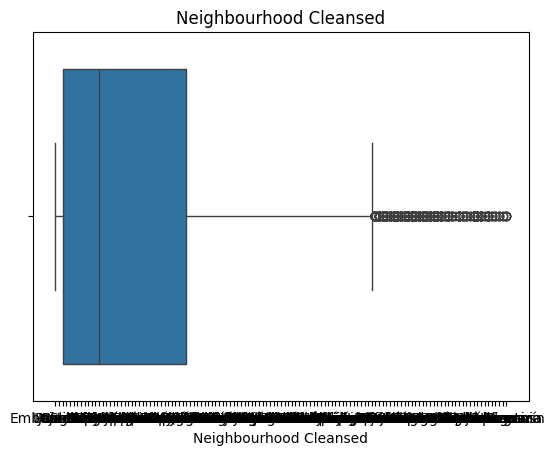

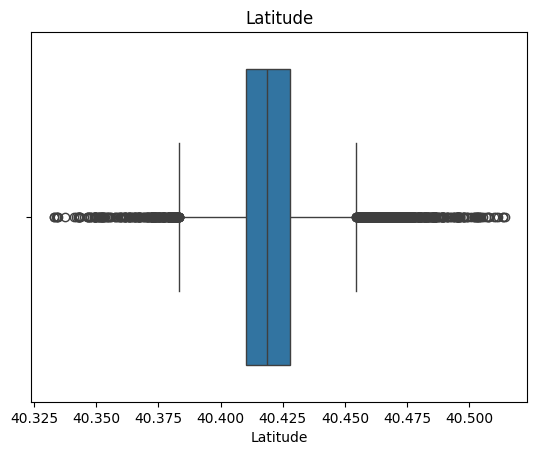

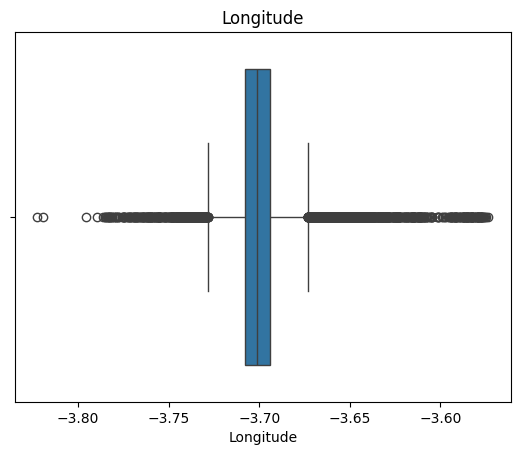

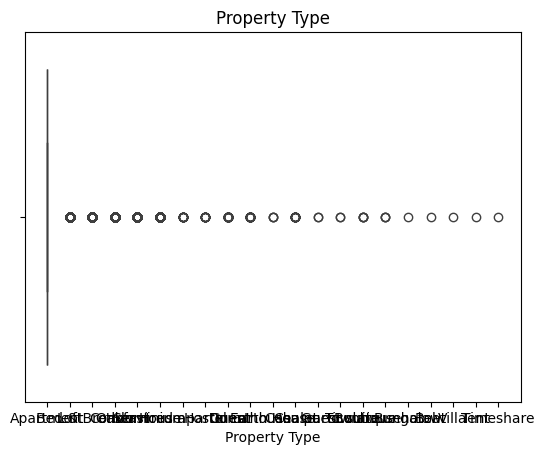

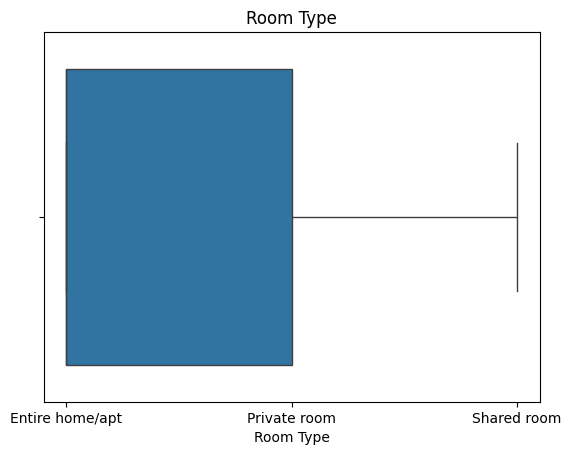

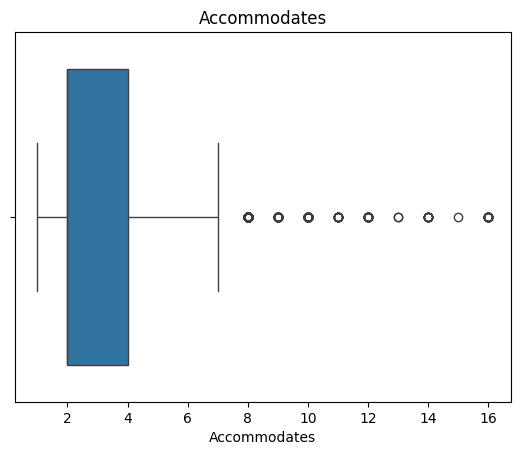

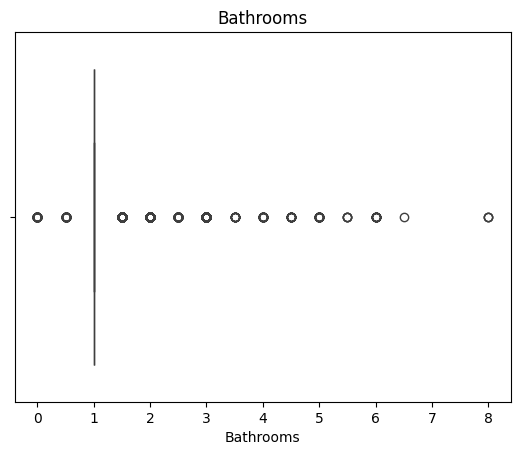

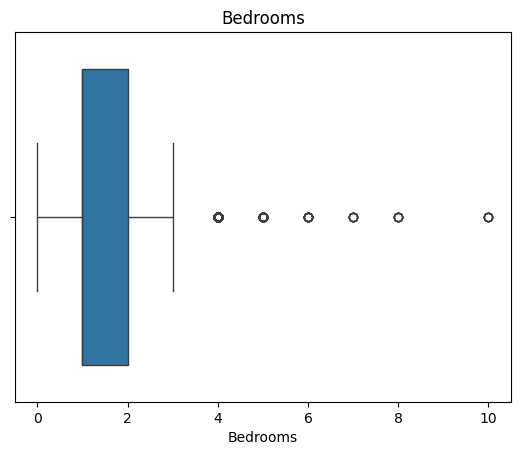

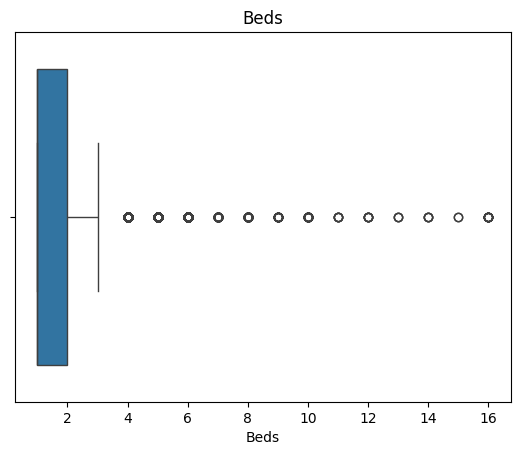

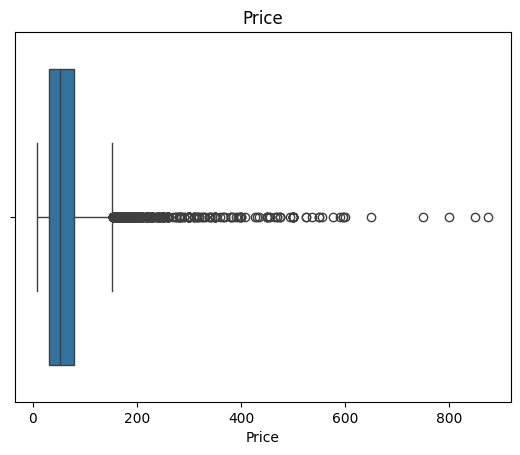

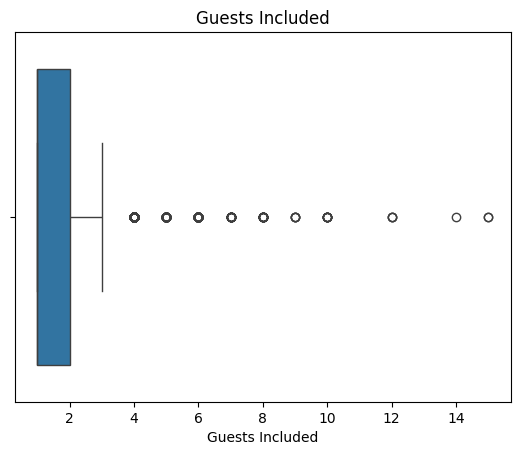

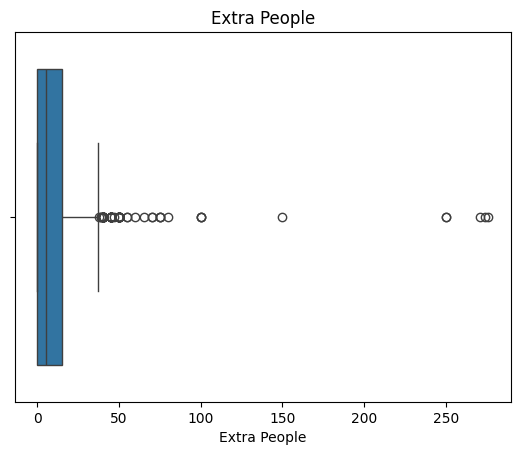

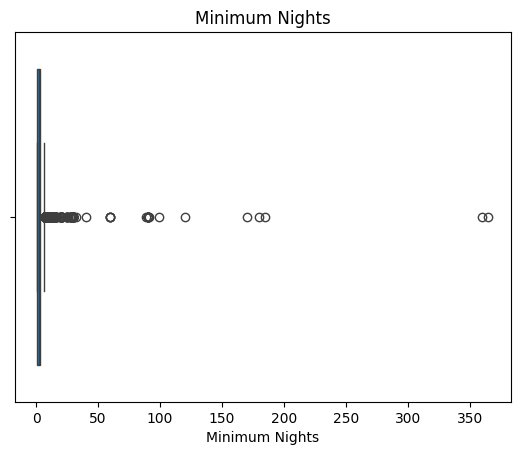

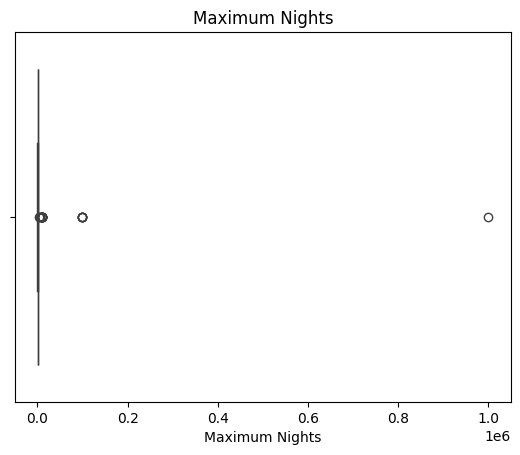

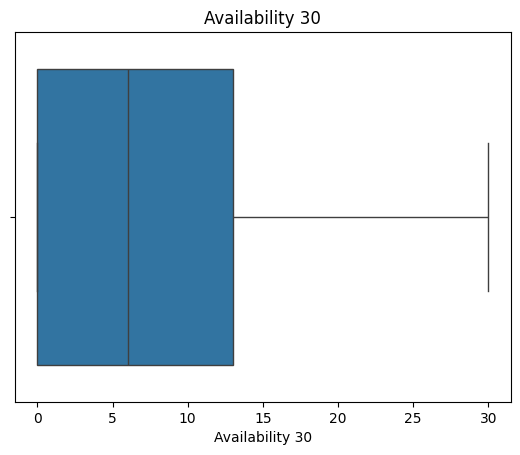

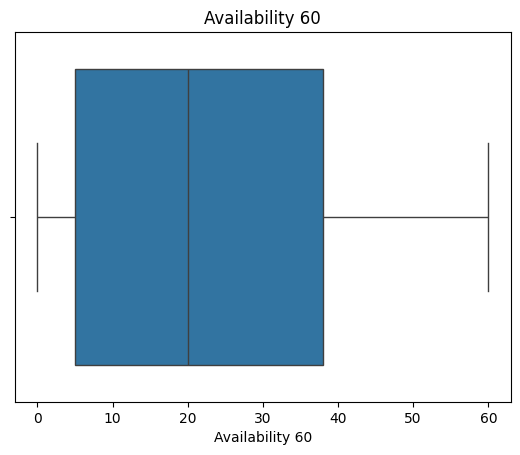

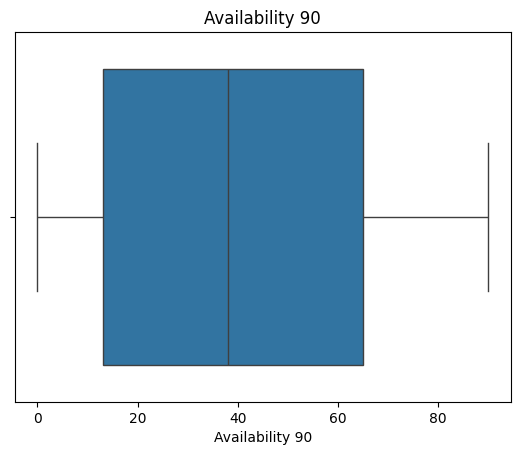

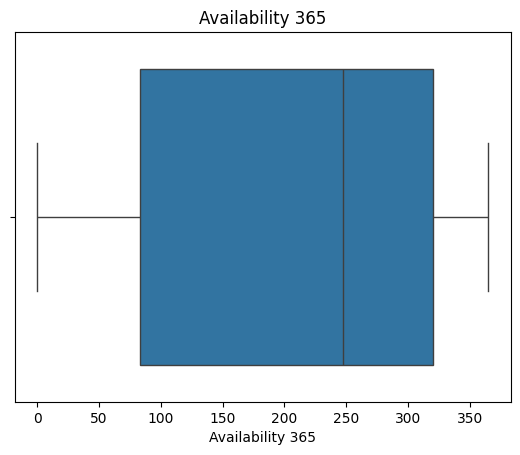

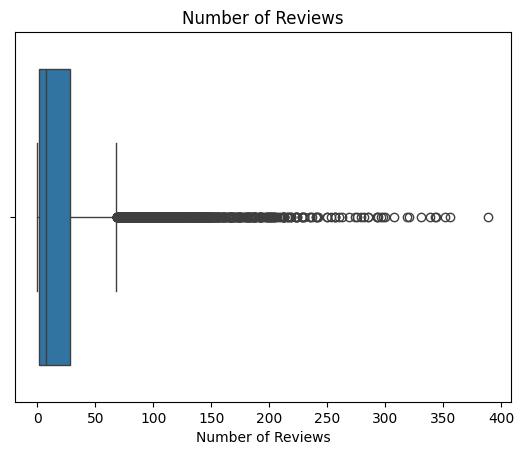

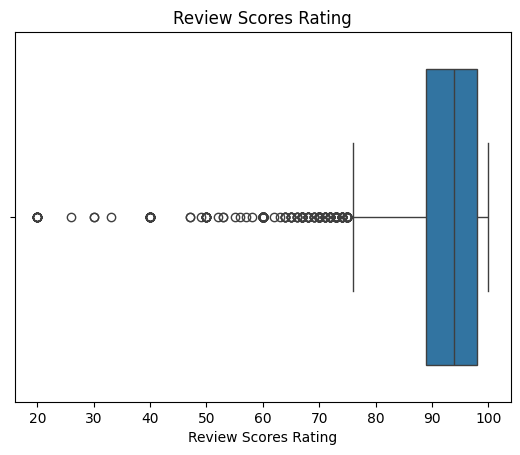

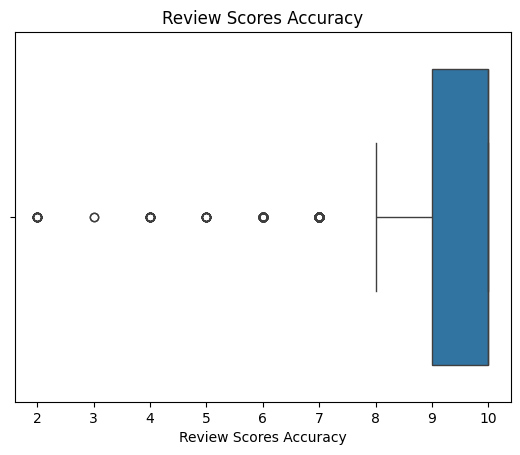

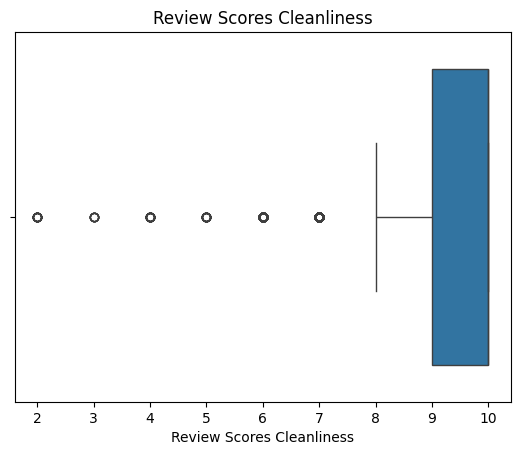

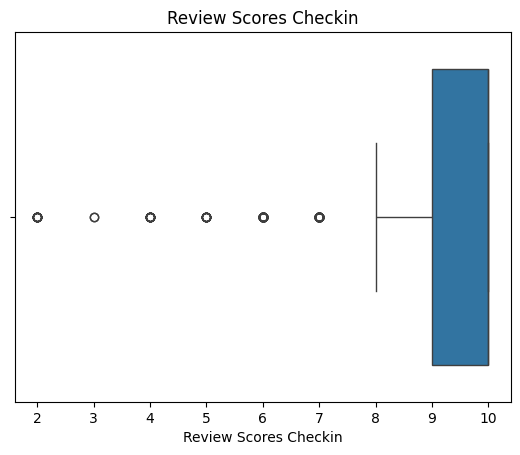

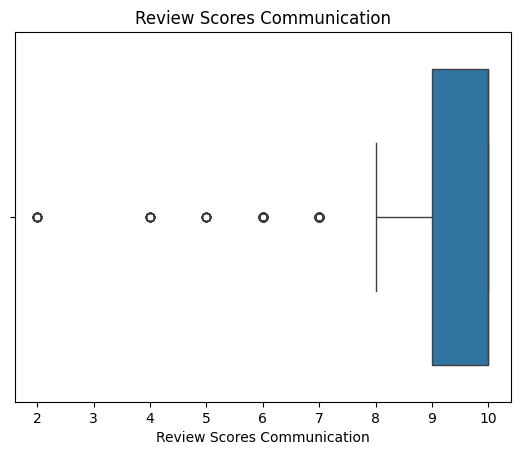

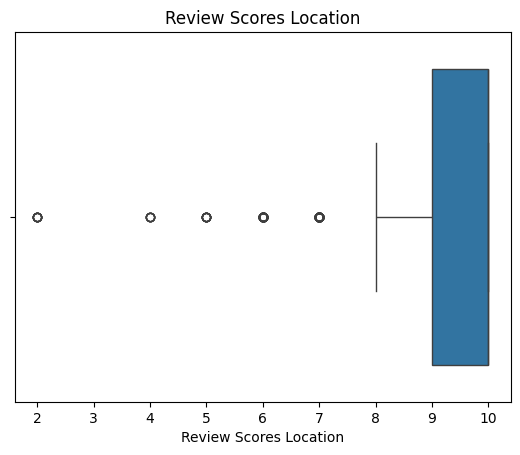

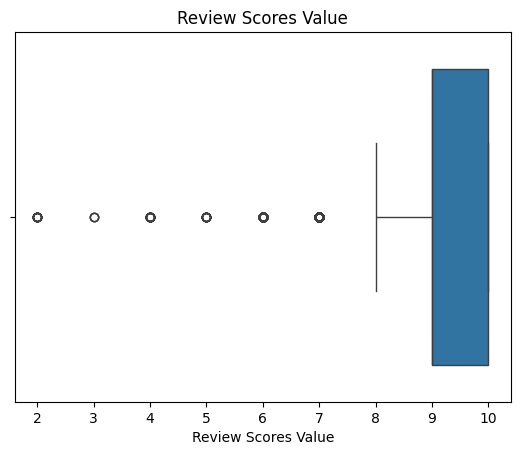

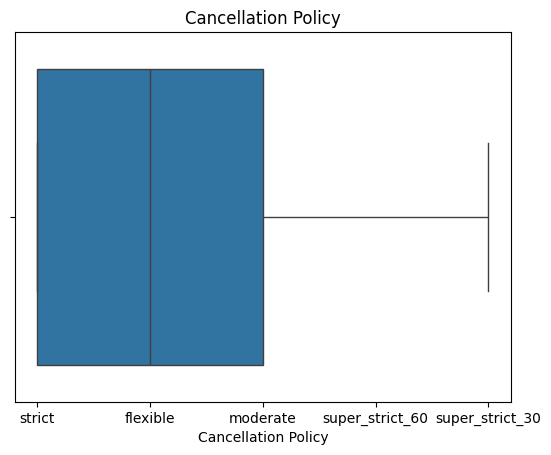

In [42]:
# Profundizando el Análisis de Outliers
columns_outliers = df.columns

for column in columns_outliers:  # Reemplaza con nombres de columnas reales
    plt.figure()
    sns.boxplot(x=df[column])
    plt.title(column)
    plt.show()


<div class = "alert alert-success">
4 ***) PROCESAMIENTO DE DATOS outliers, normalizacion, codificacion  
</div>

In [43]:
df_no_outliers_ac = df[(df['Accommodates'] <= 10)]
print(f'Original: {df.shape[0]} // Modificado: {df_no_outliers_ac.shape[0]}\nDiferencia: {df.shape[0] - df_no_outliers_ac.shape[0]}')
print(f'Variación: {((df.shape[0] - df_no_outliers_ac.shape[0])/df.shape[0])*100:2f}%')

Original: 10596 // Modificado: 10514
Diferencia: 82
Variación: 0.773877%


In [44]:
df_no_outliers_ba = df[(df['Bathrooms'] >= 0) & (df['Bathrooms'] <= 7)]
print(f'Original: {df.shape[0]} // Modificado: {df_no_outliers_ba.shape[0]}\nDiferencia: {df.shape[0] - df_no_outliers_ba.shape[0]}')
print(f'Variación: {((df.shape[0] - df_no_outliers_ba.shape[0])/df.shape[0])*100:2f}%')

Original: 10596 // Modificado: 10552
Diferencia: 44
Variación: 0.415251%


In [45]:
df_no_outliers_be = df[(df['Bedrooms'] <= 10)]
print(f'Original: {df.shape[0]} // Modificado: {df_no_outliers_be.shape[0]}\nDiferencia: {df.shape[0] - df_no_outliers_be.shape[0]}')
print(f'Variación: {((df.shape[0] - df_no_outliers_be.shape[0])/df.shape[0])*100:2f}%')

Original: 10596 // Modificado: 10578
Diferencia: 18
Variación: 0.169875%


In [46]:
df_no_outliers_bed = df[(df['Beds'] <= 10)]
print(f'Original: {df.shape[0]} // Modificado: {df_no_outliers_bed.shape[0]}\nDiferencia: {df.shape[0] - df_no_outliers_bed.shape[0]}')
print(f'Variación: {((df.shape[0] - df_no_outliers_bed.shape[0])/df.shape[0])*100:2f}%')

Original: 10596 // Modificado: 10523
Diferencia: 73
Variación: 0.688939%


In [47]:
df_no_outliers_pr = df[(df['Price'] <= 650)]
print(f'Original: {df.shape[0]} // Modificado: {df_no_outliers_pr.shape[0]}\nDiferencia: {df.shape[0] - df_no_outliers_pr.shape[0]}')
print(f'Variación: {((df.shape[0] - df_no_outliers_pr.shape[0])/df.shape[0])*100:2f}%')

Original: 10596 // Modificado: 10592
Diferencia: 4
Variación: 0.037750%


In [48]:
df_no_outliers_gi = df[(df['Guests Included'] <= 10)]
print(f'Original: {df.shape[0]} // Modificado: {df_no_outliers_gi.shape[0]}\nDiferencia: {df.shape[0] - df_no_outliers_gi.shape[0]}')
print(f'Variación: {((df.shape[0] - df_no_outliers_gi.shape[0])/df.shape[0])*100:2f}%')

Original: 10596 // Modificado: 10590
Diferencia: 6
Variación: 0.056625%


In [49]:
df_no_outliers_ep = df[(df['Extra People'] <= 150)]
print(f'Original: {df.shape[0]} // Modificado: {df_no_outliers_ep.shape[0]}\nDiferencia: {df.shape[0] - df_no_outliers_ep.shape[0]}')
print(f'Variación: {((df.shape[0] - df_no_outliers_ep.shape[0])/df.shape[0])*100:2f}%')

Original: 10596 // Modificado: 10591
Diferencia: 5
Variación: 0.047188%


In [50]:
df['Accommodates'].value_counts

<bound method IndexOpsMixin.value_counts of 0        7
1        6
2        2
3        3
4        2
        ..
10591    4
10592    4
10593    5
10594    4
10595    4
Name: Accommodates, Length: 10596, dtype: int64>

In [51]:
# Elimino columnas 
df = df.drop(['Maximum Nights'], axis=1)
df = df.drop(['Minimum Nights'], axis=1)

In [52]:
# Elimino outliers

df_no_outliers = df[(df['Accommodates'] <= 10)]
df_no_outliers = df_no_outliers[(df_no_outliers['Bathrooms'] >= 0) & (df_no_outliers['Bathrooms'] <= 7)]
df_no_outliers = df_no_outliers[(df_no_outliers['Bedrooms'] <= 10)]
df_no_outliers = df_no_outliers[(df_no_outliers['Beds'] <= 10)]
df_no_outliers = df_no_outliers[(df_no_outliers['Price'] <= 650)]
df_no_outliers = df_no_outliers[(df_no_outliers['Guests Included'] <= 10)]
df_no_outliers = df_no_outliers[(df_no_outliers['Extra People'] < 150)]


In [53]:
print(f'Original: {df.shape[0]} // Modificado: {df_no_outliers.shape[0]}\nDiferencia: {df.shape[0] - df_no_outliers.shape[0]}')
print(f'Variación: {((df.shape[0] - df_no_outliers.shape[0])/df.shape[0])*100:2f}%')

Original: 10596 // Modificado: 10433
Diferencia: 163
Variación: 1.538316%


In [54]:
# Codifico las variables categoricas.
from sklearn.preprocessing import LabelEncoder

le_Neighbourhood_Cleansed = LabelEncoder()
le_Property_Type = LabelEncoder()
le_Room_Type = LabelEncoder()
le_Cancellation_Policy = LabelEncoder()


df['Neighbourhood Cleansed'] = le_Neighbourhood_Cleansed.fit_transform(df['Neighbourhood Cleansed'])
df['Host Response Time'] = le_Property_Type.fit_transform(df['Host Response Time'])
df['Property Type'] = le_Property_Type.fit_transform(df['Property Type'])
df['Room Type'] = le_Room_Type.fit_transform(df['Room Type'])
df['Cancellation Policy'] = le_Cancellation_Policy.fit_transform(df['Cancellation Policy'])


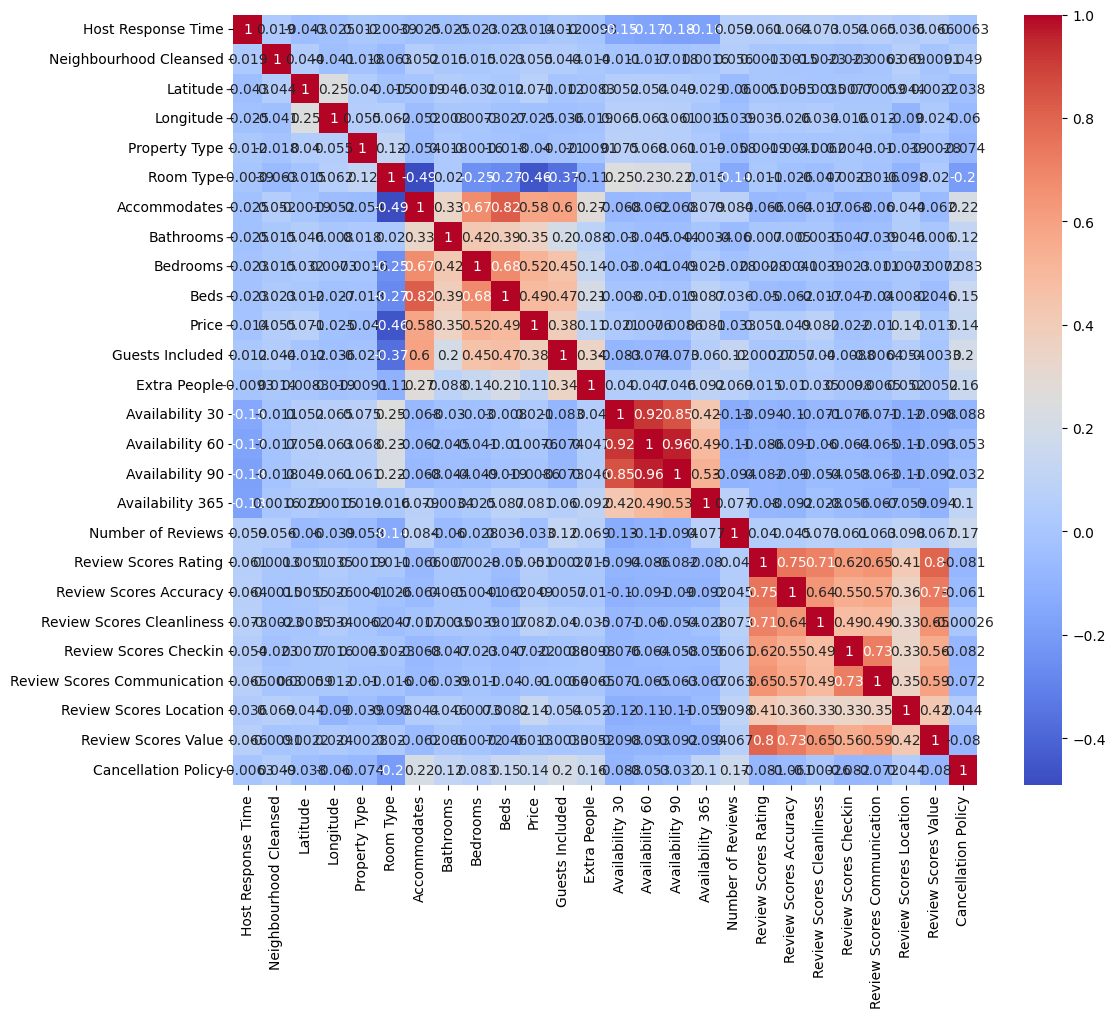

In [55]:
# Análisis de correlaciones
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

#df.info()
#df.columns[df.isnull().any()].tolist()

In [56]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10596 entries, 0 to 10595
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Host Response Time           10596 non-null  int32  
 1   Neighbourhood Cleansed       10596 non-null  int32  
 2   Latitude                     10596 non-null  float64
 3   Longitude                    10596 non-null  float64
 4   Property Type                10596 non-null  int32  
 5   Room Type                    10596 non-null  int32  
 6   Accommodates                 10596 non-null  int64  
 7   Bathrooms                    10555 non-null  float64
 8   Bedrooms                     10578 non-null  float64
 9   Beds                         10554 non-null  float64
 10  Price                        10596 non-null  float64
 11  Guests Included              10596 non-null  int64  
 12  Extra People                 10596 non-null  int64  
 13  Availability 30 

In [57]:
# Imputo las variables faltantes.

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)

# Imputando los valores faltantes
imputed_data = imputer.fit_transform(df[['Host Response Time','Neighbourhood Cleansed','Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms',
 'Bedrooms', 'Beds', 'Price', 'Guests Included', 'Extra People', 'Availability 30', 'Availability 60', 'Availability 90',
 'Availability 365', 'Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin',
 'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'Cancellation Policy']])

# Convertir los datos imputados de nuevo a un DataFrame para una mejor visualización
df = pd.DataFrame(imputed_data, columns=['Host Response Time','Neighbourhood Cleansed','Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms',
                                     'Bedrooms', 'Beds', 'Price', 'Guests Included', 'Extra People', 'Availability 30', 'Availability 60', 'Availability 90',
                                     'Availability 365', 'Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin',
                                     'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'Cancellation Policy'])


In [58]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10596 entries, 0 to 10595
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Host Response Time           10596 non-null  float64
 1   Neighbourhood Cleansed       10596 non-null  float64
 2   Latitude                     10596 non-null  float64
 3   Longitude                    10596 non-null  float64
 4   Property Type                10596 non-null  float64
 5   Room Type                    10596 non-null  float64
 6   Accommodates                 10596 non-null  float64
 7   Bathrooms                    10596 non-null  float64
 8   Bedrooms                     10596 non-null  float64
 9   Beds                         10596 non-null  float64
 10  Price                        10596 non-null  float64
 11  Guests Included              10596 non-null  float64
 12  Extra People                 10596 non-null  float64
 13  Availability 30 

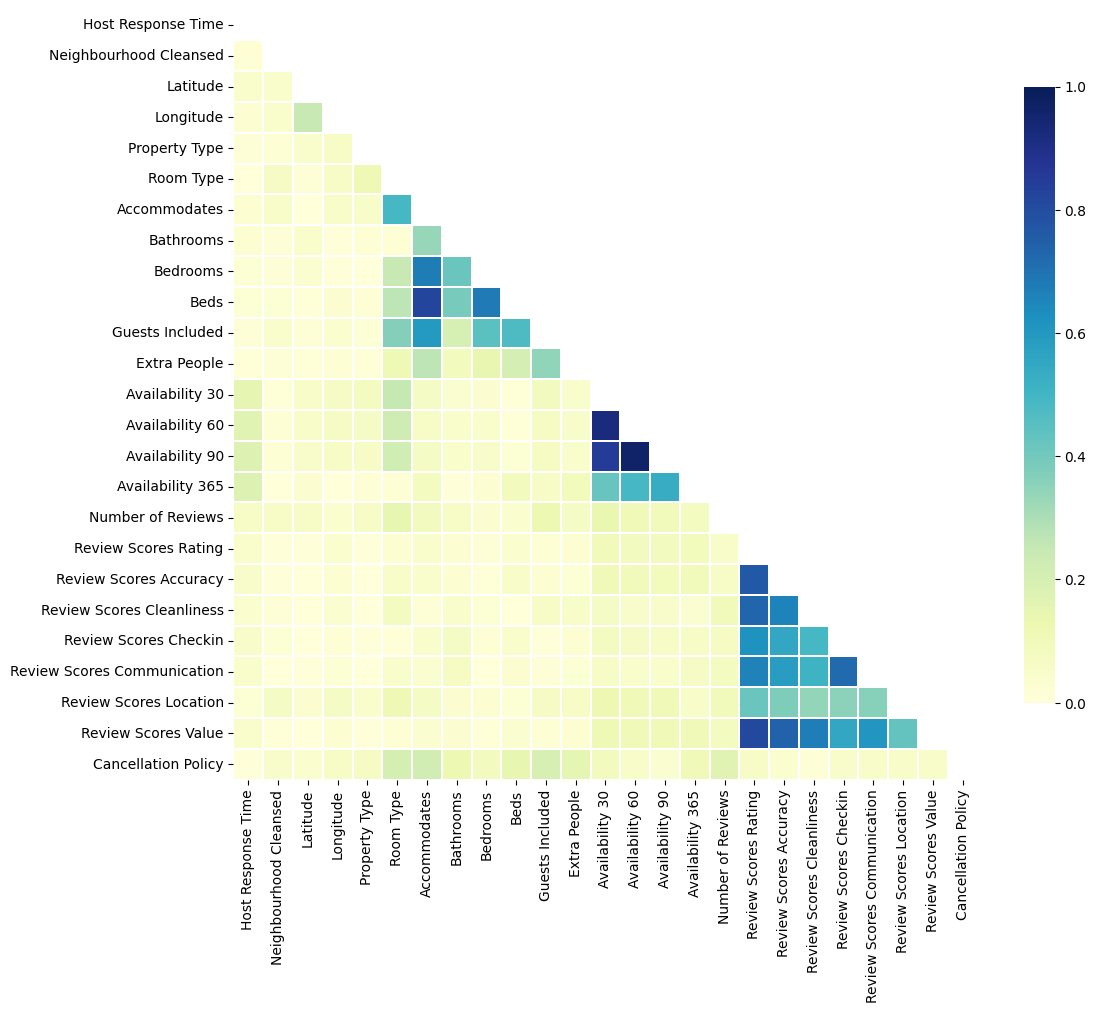

In [59]:
# Muestro la correlacion de variables
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(df.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

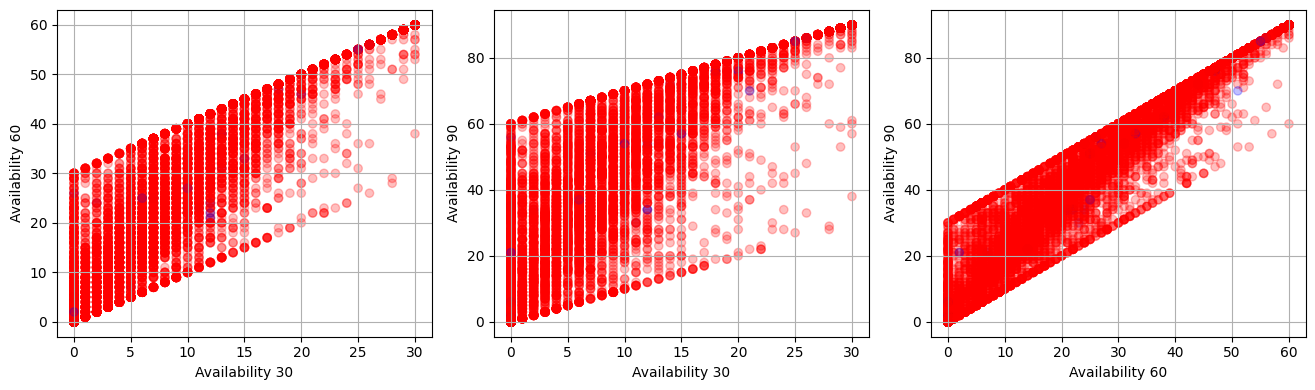

In [60]:
# Create correlation matrix
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.95
pairs = np.where(upper>0.85)
fx = df.columns[pairs[0]]
fy =  df.columns[pairs[1]]

i=1
plt.figure(figsize=(22,4))
for f1,f2 in zip(fx,fy):
    
    plt.subplot(1,5,i)
    
    plt.scatter(df[f1],df[f2], c=df['Price'],cmap=cm_bright, alpha=0.25)
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.grid()
    plt.tight_layout()
    
    i+=1
    
plt.show()

In [61]:
# Elimino variables con mas correlacion
df = df.drop(['Accommodates', 'Availability 30', 'Availability 60',  'Availability 90', 'Review Scores Rating',
             'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication',
             'Beds','Guests Included', 'Review Scores Value'], axis=1)

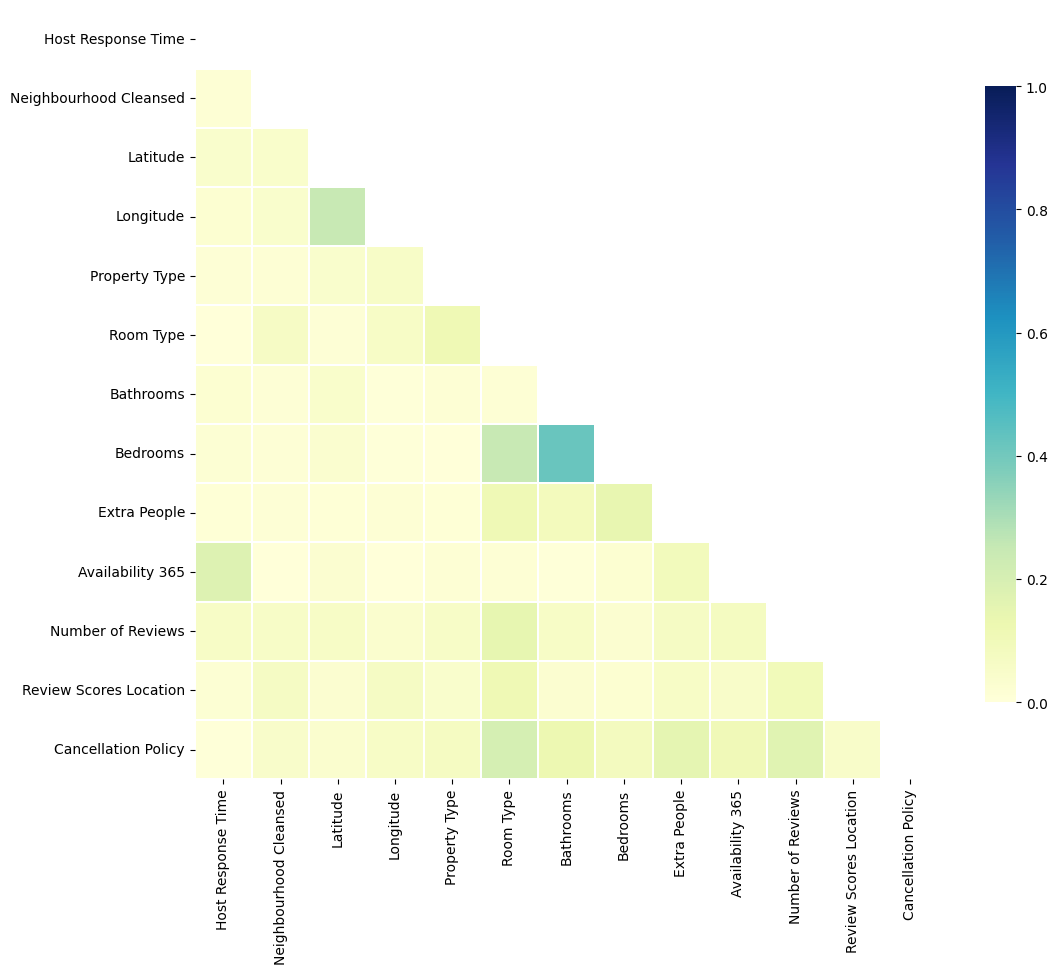

In [62]:
# Muestro la correlacion de variables luego de los cambios
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(df.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [63]:
###
### AGRUPO TODO EL CODIGO DE LAS TRANSFORMACIONES PARA APLICAR
###

# Función para transformar con manejo de etiquetas desconocidas
def transform_with_unknown_handling(encoder, data):
    known_classes = set(encoder.classes_)
    return [encoder.transform([x])[0] if x in known_classes else np.nan for x in data]

train = pd.read_csv('./train.csv', sep=';', decimal='.')

# Elimino columnas
train = train.drop(['Maximum Nights'], axis=1)
train = train.drop(['Minimum Nights'], axis=1)

# Elimino outliers
train = train[(train['Accommodates'] <= 10)]
train = train[(train['Bathrooms'] >= 1) & (train['Bathrooms'] <= 6)]
train = train[(train['Bedrooms'] <= 6)]
train = train[(train['Beds'] <= 10)]
train = train[(train['Price'] <= 650)]
train = train[(train['Guests Included'] <= 10)]
train = train[(train['Extra People'] < 150)]


# Creo los encoders
le_Neighbourhood_Cleansed = LabelEncoder()
le_Property_Type = LabelEncoder()
le_Room_Type = LabelEncoder()
le_Cancellation_Policy = LabelEncoder()

# Entreno y codifico variables
train['Neighbourhood Cleansed'] = le_Neighbourhood_Cleansed.fit_transform(train['Neighbourhood Cleansed'])
train['Property Type'] = le_Property_Type.fit_transform(train['Property Type'])
train['Room Type'] = le_Room_Type.fit_transform(train['Room Type'])
train['Cancellation Policy'] = le_Cancellation_Policy.fit_transform(train['Cancellation Policy'])

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)

# Imputando los valores faltantes
imputed_data = imputer.fit_transform(train[['Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms',
 'Bedrooms', 'Beds', 'Price', 'Guests Included', 'Extra People', 'Availability 30', 'Availability 60', 'Availability 90',
 'Availability 365', 'Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin',
 'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'Cancellation Policy']])

# Convertir los datos imputados de nuevo a un DataFrame para una mejor visualización
train = pd.DataFrame(imputed_data, columns=[ 'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms',
                                     'Bedrooms', 'Beds', 'Price', 'Guests Included', 'Extra People', 'Availability 30', 'Availability 60', 'Availability 90',
                                     'Availability 365', 'Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin',
                                     'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'Cancellation Policy'])


columnas_a_eliminar = ['Accommodates', 'Availability 30', 'Availability 60',  'Availability 90', 'Review Scores Rating',
                     'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication',
                     'Beds', 'Guests Included', 'Review Scores Value']
train =  train.drop(columnas_a_eliminar, axis=1)


In [64]:
test = pd.read_csv('./test.csv', sep=';', decimal='.')

# Elimino columnas
test = test.drop(['Maximum Nights'], axis=1)
test = test.drop(['Minimum Nights'], axis=1)

# Elimino outliers
test = test[(test['Accommodates'] <= 10)]
test = test[(test['Bathrooms'] >= 1) & (test['Bathrooms'] <= 6)]
test = test[(test['Bedrooms'] <= 6)]
test = test[(test['Beds'] <= 10)]
test = test[(test['Price'] <= 650)]
test = test[(test['Guests Included'] <= 10)]
test = test[(test['Extra People'] < 150)]

# codifico variables
test['Neighbourhood Cleansed'] = transform_with_unknown_handling(le_Property_Type, test['Neighbourhood Cleansed'])
test['Property Type'] = transform_with_unknown_handling(le_Property_Type, test['Property Type'])
test['Property Type'] = transform_with_unknown_handling(le_Property_Type, test['Property Type'])
test['Room Type'] = transform_with_unknown_handling(le_Room_Type, test['Room Type'])
test['Cancellation Policy'] = transform_with_unknown_handling(le_Cancellation_Policy, test['Cancellation Policy'])


# Imputando los valores faltantes
imputed_data = imputer.transform(test[['Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms',
 'Bedrooms', 'Beds', 'Price', 'Guests Included', 'Extra People', 'Availability 30', 'Availability 60', 'Availability 90',
 'Availability 365', 'Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin',
 'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'Cancellation Policy']])

# Convertir los datos imputados de nuevo a un DataFrame para una mejor visualización
test = pd.DataFrame(imputed_data, columns=['Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms',
                                     'Bedrooms', 'Beds', 'Price', 'Guests Included', 'Extra People', 'Availability 30', 'Availability 60', 'Availability 90',
                                     'Availability 365', 'Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin',
                                     'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'Cancellation Policy'])


test =  test.drop(columnas_a_eliminar, axis=1)


In [65]:
# Escalado para SVR
from sklearn.preprocessing import StandardScaler

# Preparamos los datos
features = train.drop(['Price'], axis=1).columns

X_train = train[features].values
y_train = train['Price'].values

X_test = test[features].values
y_test = test['Price'].values

scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test  = scaler.transform(X_test)

print('Datos train: ', Xs_train.shape)
print('Datos test:  ', Xs_test.shape)

print('Proporcion train:%0.3f'%np.mean(y_train))
print('Proporcion test: %0.3f'%np.mean(y_test))


Datos train:  (10331, 11)
Datos test:   (2587, 11)
Proporcion train:64.845
Proporcion test: 64.401


In [66]:
# Las proporciones sugiern una buena preparacion de los datos, manteniendo la distribucion consistente entre train y test

<div class = "alert alert-success">
4 ***) CONSTRUCCION DE MODELOS construccion y entrenamiento
</div>

Best mean cross-validation score: -1503.781
Best parameters: {'alpha': 0.00023357214690901214}


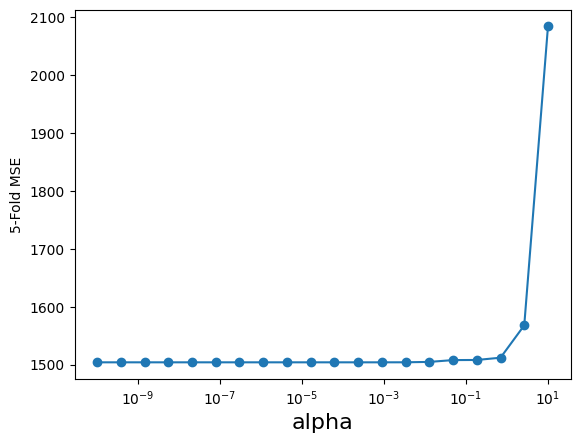

In [67]:
# Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Por convención, GridSearchCV siempre intenta MAXIMIZAR los resultados, por lo que
# funciones de coste, como MSE, tienen que ir negadas: https://github.com/scikit-learn/scikit-learn/issues/2439
# Por eso aparece neg_mean_squared_error y por eso hay luego un -1 multiplicando
#Recordar que X es mi x_train, y es my y_train

alpha_vector = np.logspace(-10,1,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("Best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("Best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
# plt.ylim((0, 1))
plt.show()

Best mean cross-validation score: 0.462
Best parameters: {'max_depth': 6}


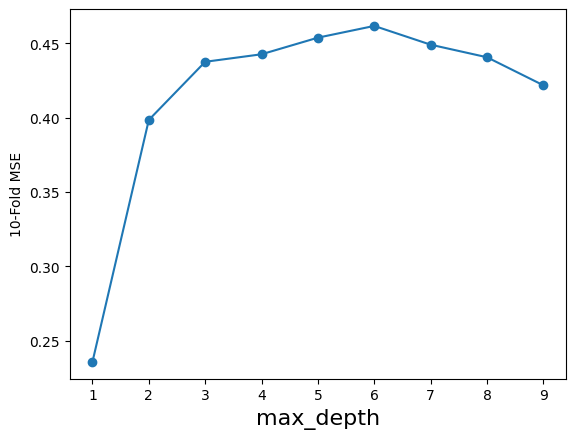

In [68]:
# Decision Tree Regresor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import tree

maxDepth = range(1,10)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 10)
grid.fit(Xs_train, y_train)
print("Best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("Best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

In [69]:
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo).fit(Xs_train,y_train)

print("Train: ",treeModel.score(Xs_train,y_train))
print("Test: ",treeModel.score(Xs_test,y_test))

Train:  0.5632260996554537
Test:  0.5101381254100386


In [70]:
# LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Seleccionar características y objetivo
X_train = train.drop(["Price"], axis=1)
y_train = train["Price"]

# Modelos
model_lr = LinearRegression()

# Cross-validation
cv_scores_lr = cross_val_score(model_lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Evaluar resultado
print(f"Mean Squared Error (Linear Regression): {cv_scores_lr.mean()}")


Mean Squared Error (Linear Regression): -1503.7817134249387


In [71]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Configuración simplificada para la búsqueda en cuadrícula
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5],
    'max_features': [None, 'sqrt', 'log2']
}

# Crear el modelo
rf = RandomForestRegressor(random_state=0)

# Instanciar GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

# Aplicar GridSearchCV
grid_search.fit(X_train, y_train)

# Mejores parametros y el mejor score encontrado
print("Best parameters:", grid_search.best_params_)
print("Best mean cross-validation score (MSE):", grid_search.best_score_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best mean cross-validation score (MSE): -1054.9519990855958


In [72]:
# GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Busqueda de hiperparametros
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 4]
}

# Inicializar
model_gb = GradientBoostingRegressor(random_state=0)

# GridSearchCV
grid_search_gb = GridSearchCV(model_gb, param_grid=param_grid_gb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Busqueda en cuadrícula
grid_search_gb.fit(X_train, y_train)

# Mostrar parametros y ejor score encontrado
print("Best parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best mean cross-validation score (MSE):", grid_search_gb.best_score_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 100}
Best mean cross-validation score (MSE): -1091.2084540840194


In [73]:
# SVR
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Definir el pipeline
pipeline_svr = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

# Hiperparametros
param_grid_svr = {
    'svr__C': [0.1, 1, 10],
    'svr__epsilon': [0.01, 0.1, 0.2],
    'svr__kernel': ['rbf']  # Opciones si hay tiempo 'linear', 'poly'
}

grid_search_svr = GridSearchCV(pipeline_svr, param_grid=param_grid_svr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Bsqueda en cuadricula
grid_search_svr.fit(Xs_train, y_train)

# Mostrar los mejores parametros y mejor score
print("Best parameters for SVR:", grid_search_svr.best_params_)
print("Best mean cross-validation score (MSE):", grid_search_svr.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters for SVR: {'svr__C': 10, 'svr__epsilon': 0.01, 'svr__kernel': 'rbf'}
Best mean cross-validation score (MSE): -1331.160008069413


In [74]:
# El modelo SVR con datos escalados por se sensible als distancias mejora, pero sigue siendo inferior a arboles para estos datos.

<div class = "alert alert-success">
** 5 - Conclusiones **
    Los modelos Gradient Boosting y Random Forest (basados en arboles) han demostrado ser mas efectivos que los modelos lineales y SVR para estos datos.

</div>